# **Sentiment Analysis of Restaurant Reviews**

### **Importing Essential libraries**

In [ ]:
import numpy as np
import pandas as pd

### **Loading the Dataset**

In [ ]:
df = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter='\\t', quoting=3)

<ipython-input-7-d67ca2de1fd3>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter='\\t', quoting=3)


In [ ]:
df.shape

(1000, 2)

In [ ]:
df.columns

Index(['Review', 'Liked'], dtype='object')

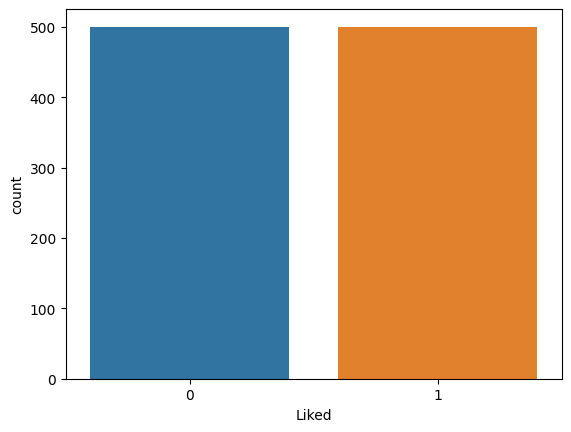

In [ ]:
import seaborn as sns
sns.countplot(x='Liked', data=df)
plt.show()

In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


### **Infomation about DataFrame**

In [ ]:
df.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

### **Data Preprocessing**

In [ ]:
# Importing essential libraries for performing Natural Language Processing on 'Restaurant_Reviews.tsv' dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### **Cleaning the Reviews**

In [ ]:
# Cleaning the reviews
corpus = []
for i in range(0,1000):

  # Cleaning special character from the reviews
  review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=df['Review'][i])

  # Converting the entire review into lower case
  review = review.lower()

  # Tokenizing the review by words
  review_words = review.split()

  # Removing the stop words
  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

  # Stemming the words
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]

  # Joining the stemmed words
  review = ' '.join(review)

  # Creating a corpus
  corpus.append(review)

In [ ]:
corpus[0:10]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

## **Creating the Bag of Words Model**

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

### **Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### **Fitting Naive Bayes to the Training set**

In [ ]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

## **Predicting the Test set Results**


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

## **Accuracy Score**

In [ ]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("---- Scores ----")
print("Accuracy score is: {} %".format(round(score1*100,2)))
print("Precision score is: {} %".format(round(score2*100,2)))
print("Recall score is: {} %".format(round(score3*100,2)))

---- Scores ----
Accuracy score is: 76.5 %
Precision score is: 76.42 %
Recall score is: 78.64 %


### **Making the Confusion Matrix**

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[72, 25],
       [22, 81]])

### **Plotting the Confusion Matrix**

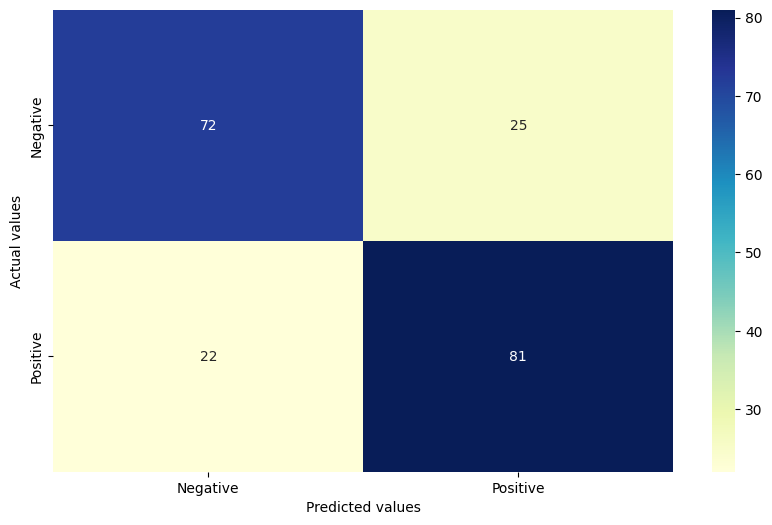

In [ ]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values');

### **Hyperparameter tuning the Naive Bayes Classifier**

In [ ]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 78.0%
Accuracy score for alpha=0.2 is: 78.5%
Accuracy score for alpha=0.3 is: 78.0%
Accuracy score for alpha=0.4 is: 78.0%
Accuracy score for alpha=0.5 is: 77.5%
Accuracy score for alpha=0.6 is: 77.5%
Accuracy score for alpha=0.7 is: 77.5%
Accuracy score for alpha=0.8 is: 77.0%
Accuracy score for alpha=0.9 is: 76.5%
Accuracy score for alpha=1.0 is: 76.5%
--------------------------------------------
The best accuracy is 78.5% with alpha value as 0.2


In [ ]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

### **Predictions**

In [ ]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [ ]:
result = ['Negetive Review !','Positive Review !']

In [ ]:
# Predicting values
sample_review = 'The food is really good here.'

if predict_sentiment(sample_review):
  print(result[1])
else:
  print(result[0])

Positive Review !


In [ ]:
# Predicting values
sample_review = 'Food was pretty bad and the service was very slow.'

if predict_sentiment(sample_review):
  print(result[1])
else:
  print(result[0])

Negetive Review !


In [ ]:
# Predicting values
sample_review = 'The food was absolutely wonderful, from preparation to presentation, very pleasing.'

if predict_sentiment(sample_review):
  print(result[1])
else:
  print(result[0])

Positive Review !


In [ ]:
# Predicting values
sample_review = 'The food was good. But the service was very slow.'

if predict_sentiment(sample_review):
  print(result[1])
else:
  print(result[0])


Negetive Review !


In [ ]:
# Predicting values
sample_review = 'The food is as usual. also the service is not good.'

if predict_sentiment(sample_review):
  print(result[1])
else:
  print(result[0])

Positive Review !


### **Analysis Using Different Models**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=12)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### **Logistic Regression**

In [ ]:
#Logistic Regression
lr = LogisticRegression(random_state=0, C=0.82286, max_iter=2000, solver='lbfgs')
cv = cross_val_score(lr,X_train,y_train,cv=kfold)
print('\nCross-validation-score of the Logistic Regression:\n',cv)
print('\nTraning Accuracy of the Logistic Regression:\n',cv.mean()*100)
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
print('\nTesting Accuracy of the Logistic Regression:\n',metrics.accuracy_score(y_pred_lr,y_test)*100)
cm=confusion_matrix(y_test, y_pred_lr)
print('\nConfusion Matrix of the Logistic Regression:\n',cm)


Cross-validation-score of the Logistic Regression:
 [0.73134328 0.80597015 0.76119403 0.82089552 0.79104478 0.7761194
 0.7761194  0.79104478 0.74242424 0.74242424 0.81818182 0.77272727]

Traning Accuracy of the Logistic Regression:
 77.74574099200964

Testing Accuracy of the Logistic Regression:
 71.0

Confusion Matrix of the Logistic Regression:
 [[76 21]
 [37 66]]


### **Naive Bayes**

### **GaussianNB**

In [ ]:
#GaussianNB
gnb = GaussianNB(var_smoothing=1e-2)
cv = cross_val_score(gnb,X_train,y_train,cv=kfold)
print('\nCross-validation-score of the GaussianNB:\n',cv)
print('\nTraning Accuracy of the GaussianNB:\n',cv.mean()*100)
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)
print('\nTesting Accuracy of the GaussianNB:\n', metrics.accuracy_score(y_pred_gnb,y_test)*100)
cm=confusion_matrix(y_test, y_pred_gnb)
print('\nConfusion Matrix of the GaussianNB:\n',cm)


Cross-validation-score of the GaussianNB:
 [0.67164179 0.70149254 0.76119403 0.70149254 0.68656716 0.64179104
 0.73134328 0.7761194  0.63636364 0.65151515 0.78787879 0.72727273]

Traning Accuracy of the GaussianNB:
 70.62226745062566

Testing Accuracy of the GaussianNB:
 74.0

Confusion Matrix of the GaussianNB:
 [[60 37]
 [15 88]]


### **MultinomialNB**

In [ ]:
#MultinomialNB
mnb = MultinomialNB(alpha=2)
cv = cross_val_score(mnb,X_train,y_train,cv=kfold)
print('\nCross-validation-score of the MultinomialNB:\n',cv)
print('\nTraning Accuracy of the MultinomialNB:\n',cv.mean()*100)
mnb.fit(X_train,y_train)
y_pred_mnb=mnb.predict(X_test)
print('\nTesting Accuracy of the MultinomialNB:\n', metrics.accuracy_score(y_pred_mnb,y_test)*100)
cm=confusion_matrix(y_test, y_pred_mnb)
print('\nConfusion Matrix of the MultinomialNB:\n',cm)


Cross-validation-score of the MultinomialNB:
 [0.74626866 0.80597015 0.71641791 0.7761194  0.79104478 0.70149254
 0.76119403 0.7761194  0.77272727 0.72727273 0.83333333 0.83333333]

Traning Accuracy of the MultinomialNB:
 77.01077943615257

Testing Accuracy of the MultinomialNB:
 76.5

Confusion Matrix of the MultinomialNB:
 [[73 24]
 [23 80]]


### **BernoulliNB**

In [ ]:
#BernoulliNB
bnb = BernoulliNB(alpha=10)
cv = cross_val_score(bnb,X_train,y_train,cv=kfold)
print('\nCross-validation-score of the BernoulliNB:\n',cv)
print('\nTraning Accuracy of the BernoulliNB:\n',cv.mean()*100)
mnb.fit(X_train,y_train)
y_pred_bnb=mnb.predict(X_test)
print('\nTesting Accuracy of the BernoulliNB:\n', metrics.accuracy_score(y_pred_bnb,y_test)*100)
cm=confusion_matrix(y_test, y_pred_bnb)
print('\nConfusion Matrix of the BernoulliNB:\n',cm)


Cross-validation-score of the BernoulliNB:
 [0.73134328 0.80597015 0.73134328 0.80597015 0.71641791 0.7761194
 0.7761194  0.71641791 0.78787879 0.75757576 0.72727273 0.77272727]

Traning Accuracy of the BernoulliNB:
 75.87630031659883

Testing Accuracy of the BernoulliNB:
 76.5

Confusion Matrix of the BernoulliNB:
 [[73 24]
 [23 80]]


### **Random Forest Classifier**

In [ ]:
#Random Forest Classifier
rf = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=30,
                       max_features='log2', min_samples_leaf=2,
                       n_estimators=500, random_state=0)
rf.fit(X_train, y_train)
cv = cross_val_score(rf,X_train,y_train,cv=kfold)
print('\nCross-validation-score of the Random Forest Classifier:\n',cv)
print('\nTraning Accuracy of the Random Forest Classifier:\n',cv.mean()*100)
y_pred_rf = rf.predict(X_test)
print('\nTesting Accuracy of the Random Forest Classifier:\n',metrics.accuracy_score(y_pred_rf,y_test)*100)
cm=confusion_matrix(y_test, y_pred_rf)
print('\nConfusion Matrix of the Random Forest Classifier:\n',cm)


Cross-validation-score of the Random Forest Classifier:
 [0.76119403 0.80597015 0.74626866 0.79104478 0.79104478 0.7761194
 0.76119403 0.76119403 0.77272727 0.72727273 0.78787879 0.83333333]

Traning Accuracy of the Random Forest Classifier:
 77.62701643298658

Testing Accuracy of the Random Forest Classifier:
 76.5

Confusion Matrix of the Random Forest Classifier:
 [[86 11]
 [36 67]]


### **Support Vector Classifier**

### **Linear SVC**

In [ ]:
#Linear SVC
svcl = SVC(kernel = 'linear', random_state = 0, probability=True)
svcl.fit(X_train, y_train)
cv = cross_val_score(svcl,X_train,y_train,cv=kfold)
print('\nCross-validation-score of the Linear SVC:\n',cv)
print('\nTraning Accuracy of theLinear SVC:\n',cv.mean()*100)
y_pred_svcl = svcl.predict(X_test)
print('\nTesting Accuracy of the Linear SVC:\n',metrics.accuracy_score(y_pred_svcl,y_test)*100)
cm=confusion_matrix(y_test, y_pred_svcl)
print('\nConfusion Matrix of the Linear SVC:\n',cm)


Cross-validation-score of the Linear SVC:
 [0.74626866 0.79104478 0.7761194  0.79104478 0.73134328 0.7761194
 0.80597015 0.79104478 0.74242424 0.71212121 0.74242424 0.75757576]

Traning Accuracy of theLinear SVC:
 76.36250565355044

Testing Accuracy of the Linear SVC:
 72.0

Confusion Matrix of the Linear SVC:
 [[74 23]
 [33 70]]


### **Radial Basis Function Support Vector Machine**

In [ ]:
#rbf SVC
from sklearn.svm import SVC
svck = SVC(kernel = 'rbf', random_state = 0, probability=True)
svck.fit(X_train, y_train)
cv = cross_val_score(svck,X_train,y_train,cv=kfold)
print('\nCross-validation-score of the rbf SVC:\n',cv)
print('\nTraning Accuracy of the rbf SVC:\n',cv.mean()*100)
y_pred_svck = svck.predict(X_test)
print('\nTesting Accuracy of the rbf SVC:\n',metrics.accuracy_score(y_pred_svck,y_test)*100)
cm=confusion_matrix(y_test, y_pred_svck)
print('\nConfusion Matrix of the rbf SVC:\n',cm)


Cross-validation-score of the rbf SVC:
 [0.74626866 0.79104478 0.73134328 0.82089552 0.71641791 0.80597015
 0.76119403 0.74626866 0.77272727 0.6969697  0.78787879 0.81818182]

Traning Accuracy of the rbf SVC:
 76.62633800693503

Testing Accuracy of the rbf SVC:
 73.5

Confusion Matrix of the rbf SVC:
 [[90  7]
 [46 57]]


### **Voting Classifier**

In [ ]:
#VCLF
voting_clf = VotingClassifier(estimators = [('lr', lr),('bnb',bnb),('mnb',mnb),('gnb', gnb),
                                            ('rf',rf),('svck',svck),('svcl',svcl)], voting = 'soft')
voting_clf.fit(X_train, y_train)
cv = cross_val_score(voting_clf,X_train,y_train,cv=kfold)
print('\nCross-validation-score of the VCLF:\n',cv)
print('\nTraning Accuracy of the VCLF:\n',cv.mean()*100)
y_pred_vclf = voting_clf.predict(X_test)
print('\nTesting Accuracy of the VCLF:\n',metrics.accuracy_score(y_pred_vclf,y_test)*100)
cm=confusion_matrix(y_test, y_pred_vclf)
print('\nConfusion Matrix of the VCLF:\n',cm)



Cross-validation-score of the VCLF:
 [0.73134328 0.79104478 0.79104478 0.79104478 0.76119403 0.76119403
 0.7761194  0.86567164 0.71212121 0.74242424 0.84848485 0.77272727]

Traning Accuracy of the VCLF:
 77.8701191014624

Testing Accuracy of the VCLF:
 77.5

Confusion Matrix of the VCLF:
 [[74 23]
 [22 81]]


In [ ]:
print(classification_report(y_test, y_pred_vclf))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77        97
           1       0.78      0.79      0.78       103

    accuracy                           0.78       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.78      0.77       200



# **Since, the data is fairly balanced.From above distinct classifiers and various Voting Classifier combinations, highest accuracy achieved was 77.5 % with cross_val_score of 77.87 % with Voting Classifier.**

### **Training vs. Testing Data for Different Models**

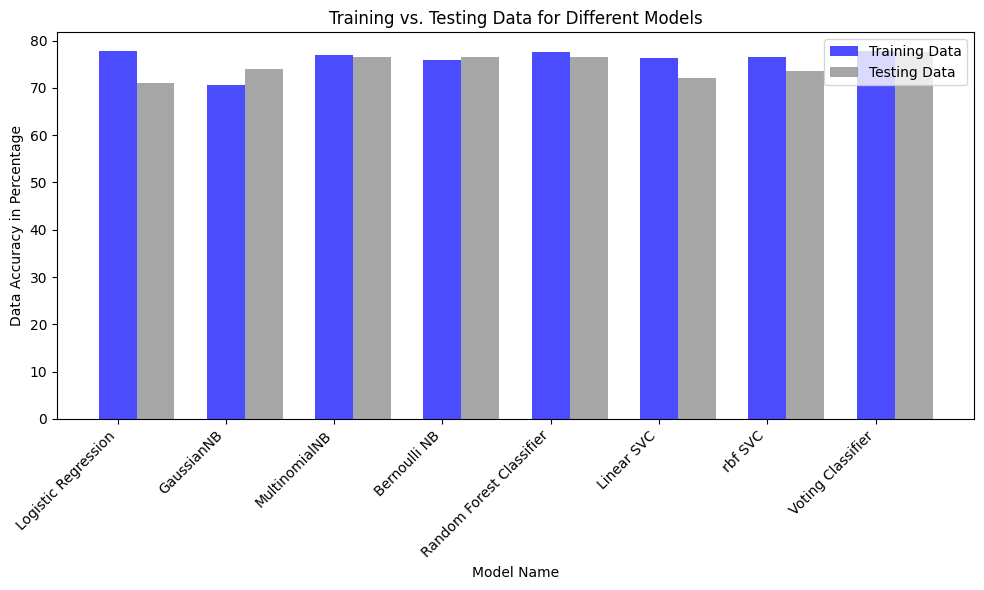

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Logistic Regression', 'GaussianNB', 'MultinomialNB', 'Bernoulli NB', 'Random Forest Classifier', 'Linear SVC', 'rbf SVC',' Voting Classifier',]
training_data = [77.74, 70.62, 77.01, 75.87, 77.62, 76.36, 76.62, 77.87]
testing_data = [71.0, 74.0, 76.5, 76.5, 76.5, 72.0, 73.5, 77.5]

fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(models))

width = 0.35

ax.bar(x, training_data, width=width, label='Training Data', align='center', alpha=0.7, color='blue')

ax.bar(x + width, testing_data, width=width, label='Testing Data', align='center', alpha=0.7, color='grey')

ax.set_xlabel('Model Name')
ax.set_ylabel('Data Accuracy in Percentage')
ax.set_title('Training vs. Testing Data for Different Models')

ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')  # Rotate labels for readability

ax.legend()

plt.tight_layout()
plt.show()